<a href="https://colab.research.google.com/github/absognety/EVA4/blob/master/Week-5/second_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Target :

- 99.4% (this must be consistently shown in your last few epochs, and not a one-time achievement)
- Less than or equal to 15 Epochs
- Less than 10000 Parameters
- Do this in minimum 5 steps

#  . 
### Result : - Total params: 17,716

### Epochs:  
  
EPOCH: 8
Loss=0.0038727622013539076 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:11<00:00, 39.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]
Test set: Average loss: 0.0269, Accuracy: 9915/10000 (99.15%)

EPOCH: 9
Loss=0.04680580273270607 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:11<00:00, 40.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]
Test set: Average loss: 0.0272, Accuracy: 9918/10000 (99.18%)

EPOCH: 10
Loss=0.0221934225410223 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:11<00:00, 40.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]
Test set: Average loss: 0.0263, Accuracy: 9916/10000 (99.16%)

EPOCH: 11
Loss=0.013670255430042744 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:11<00:00, 40.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]
Test set: Average loss: 0.0299, Accuracy: 9905/10000 (99.05%)

EPOCH: 12
Loss=0.06099344789981842 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:11<00:00, 40.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]
Test set: Average loss: 0.0251, Accuracy: 9928/10000 (99.28%)

EPOCH: 13
Loss=0.021720698103308678 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:11<00:00, 39.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]
Test set: Average loss: 0.0266, Accuracy: 9921/10000 (99.21%)

EPOCH: 14
Loss=0.004181633237749338 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:11<00:00, 40.10it/s]

Test set: Average loss: 0.0260, Accuracy: 9917/10000 (99.17%)


### Analysis : 

- Using Basic Skeleton along with additional features.
- Changed the Input & Output channels and Kernal size and added Batch Normalisation & Dropouts
- Max Accuracy = 99.28%, we are getting there (99.4), number of times accuracy is greater than 99.1 is 6 and greater than 99.2 is 2. Almost there.
- Number of parameters have been increased due to batch norm.

### Action :
- Need to reduce to less than 10k parameters as specified in problem statement.
- Let's try adding the gap before the last layer.

In [0]:
### Model Spec


In [0]:
## Importing the Libraries 

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [0]:
## Transformation

# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [3]:
## Data Set - trian test split 

train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [4]:
## Data Loader arguments : Train Test arguments 

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(0.0009)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


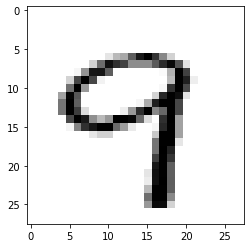

In [5]:
## Data Statistics 

# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

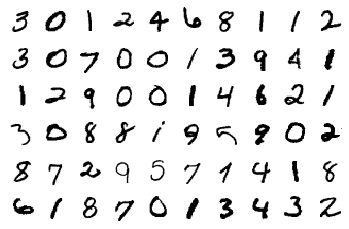

In [6]:
## View more images to know more images : Can give idea for transformation 

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
## How we got the mean and standard deviaion values 

# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1305)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(1,16,3),nn.ReLU(),nn.BatchNorm2d(16),nn.Dropout2d(0.1),
                                nn.Conv2d(16,32,3),nn.ReLU(),nn.BatchNorm2d(32),nn.Dropout2d(0.1),
                                nn.Conv2d(32,10,3),nn.ReLU(),#nn.BatchNorm2d(128),nn.Dropout2d(0.05),
                                nn.MaxPool2d(2,2)
                                )

    self.conv2 = nn.Sequential(
                                nn.Conv2d(10,16,3),nn.ReLU(),nn.BatchNorm2d(16),nn.Dropout2d(0.1),
                                nn.Conv2d(16,16,3),nn.ReLU(),nn.BatchNorm2d(16),nn.Dropout2d(0.1),
                                nn.Conv2d(16,16,3),nn.ReLU(),#nn.BatchNorm2d(16),nn.Dropout2d(0.1),
                                #nn.MaxPool2d(2,2)
                                )
    
    self.conv3 = nn.Sequential(
                                nn.Conv2d(16,16,3),nn.ReLU(),#nn.BatchNorm2d(16),nn.Dropout2d(0.1),
                                nn.Conv2d(16,10,3),nn.ReLU(),#nn.BatchNorm2d(10),nn.Dropout2d(0.05),
                                
                                )

## Batchnorm () - Comment

  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)

    x = x.view(-1,10)

    return F.log_softmax(x)

In [0]:
### The Model 9 : CHANGING THE IMAGE AUGMENTATION ### Above code -- Check rotaiton of the images ## ROTATE BEFORE CONERTING TO TENSOR ## We cna do after also, But not after normalisation

In [0]:
### The Model 10 :: OVER KiLl 

### Using the LR Scheduler

In [20]:
## Model Parameters

!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
         Dropout2d-4           [-1, 16, 26, 26]               0
            Conv2d-5           [-1, 32, 24, 24]           4,640
              ReLU-6           [-1, 32, 24, 24]               0
       BatchNorm2d-7           [-1, 32, 24, 24]              64
         Dropout2d-8           [-1, 32, 24, 24]               0
            Conv2d-9           [-1, 10, 22, 22]           2,890
             ReLU-10           [-1, 10, 22, 22]               0
        MaxPool2d-11           [-1, 10, 11, 11]               0
           Conv2d-12             [-1, 16, 9, 9]           1,456
             ReLU-13             [-1, 16, 9, 9]               0
      BatchNorm2d-14             [

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [0]:
### Training & testing 

from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [14]:
## Train and test our model 

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Loss=0.07106881588697433 Batch_id=468 Accuracy=85.98: 100%|██████████| 469/469 [00:11<00:00, 39.74it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0682, Accuracy: 9786/10000 (97.86%)

EPOCH: 1


Loss=0.06870264559984207 Batch_id=468 Accuracy=97.34: 100%|██████████| 469/469 [00:11<00:00, 40.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0476, Accuracy: 9842/10000 (98.42%)

EPOCH: 2


Loss=0.06790423393249512 Batch_id=468 Accuracy=97.90: 100%|██████████| 469/469 [00:11<00:00, 40.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0400, Accuracy: 9874/10000 (98.74%)

EPOCH: 3


Loss=0.060141462832689285 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:11<00:00, 40.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0371, Accuracy: 9887/10000 (98.87%)

EPOCH: 4


Loss=0.05614541843533516 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:11<00:00, 39.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0342, Accuracy: 9897/10000 (98.97%)

EPOCH: 5


Loss=0.034176360815763474 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:11<00:00, 39.60it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0317, Accuracy: 9894/10000 (98.94%)

EPOCH: 6


Loss=0.04476521536707878 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:11<00:00, 40.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9908/10000 (99.08%)

EPOCH: 7


Loss=0.06440771371126175 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:11<00:00, 40.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0354, Accuracy: 9885/10000 (98.85%)

EPOCH: 8


Loss=0.0038727622013539076 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:11<00:00, 39.99it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0269, Accuracy: 9915/10000 (99.15%)

EPOCH: 9


Loss=0.04680580273270607 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:11<00:00, 40.23it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9918/10000 (99.18%)

EPOCH: 10


Loss=0.0221934225410223 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:11<00:00, 40.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 9916/10000 (99.16%)

EPOCH: 11


Loss=0.013670255430042744 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:11<00:00, 40.39it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0299, Accuracy: 9905/10000 (99.05%)

EPOCH: 12


Loss=0.06099344789981842 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:11<00:00, 40.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0251, Accuracy: 9928/10000 (99.28%)

EPOCH: 13


Loss=0.021720698103308678 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:11<00:00, 39.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0266, Accuracy: 9921/10000 (99.21%)

EPOCH: 14


Loss=0.004181633237749338 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:11<00:00, 40.10it/s]



Test set: Average loss: 0.0260, Accuracy: 9917/10000 (99.17%)



Text(0.5, 1.0, 'Test Accuracy')

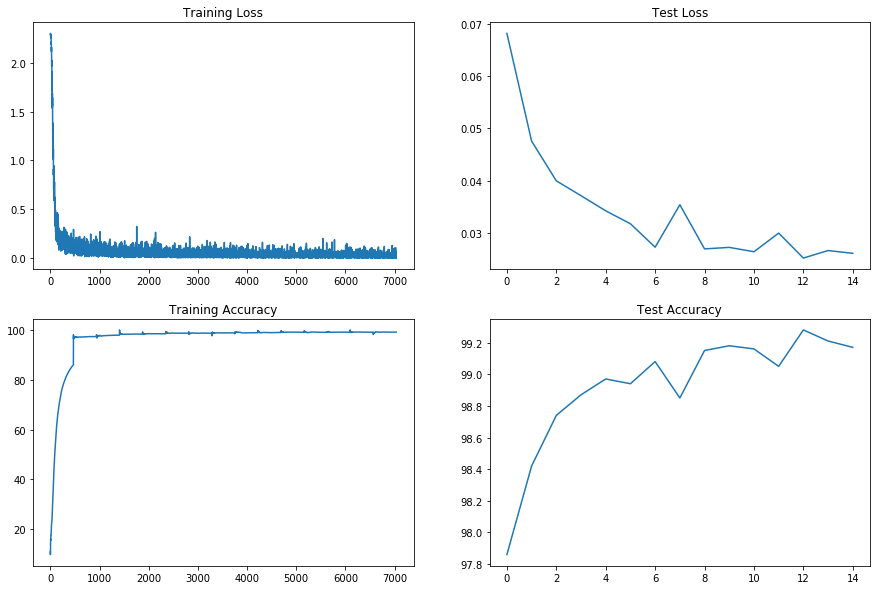

In [15]:
## Plot the accuracy graphs 

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")